In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#bring in data
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")
air_pollution = pd.read_csv("../Data/death-rate-by-source-from-air-pollution.csv")
vac_prev_death = pd.read_csv("../Data/deaths-caused-by-vaccine-preventable-diseases.csv")
health_ins_cov = pd.read_csv("../Data/health-insurance-coverage-in-the-us.csv")
death_risk = pd.read_csv("../Data/number-of-deaths-by-risk-factor.csv")
suicide = pd.read_csv("../Data/suicide-death-rates.csv")
inf_disease = pd.read_csv("../Data/the-number-of-cases-of-infectious-diseases.csv")

# Clean and Transform Data
Filter for the Country (maybe the year as well)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (True))
#human_df_clean.insert(4, 'start_value_human', 0.901)
human_df_clean['start_value_human'] = (human_df_clean['Human Development Index (UNDP)'].shift(1))
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]
human_df_clean

,Entity,Year,score_human
4780,United States,2006,NaN
4781,United States,2007,0.0044
4782,United States,2008,0.0055
4783,United States,2009,0.0000
4784,United States,2010,0.0044
4785,United States,2011,0.0033
4786,United States,2012,0.0011
4787,United States,2013,-0.0022
4788,United States,2014,0.0022
4789,United States,2015,0.0022


In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (True))
#happiness_clean.insert(4, 'start_value_h', 7.181794)
happiness_clean['start_value_h'] = (happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'].shift(1))
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]
happiness_clean

,Entity,Year,score_happy
1604,United States,2006,NaN
1605,United States,2007,0.0461
1606,United States,2008,-0.0309
1607,United States,2009,-0.0168
1608,United States,2010,0.0008
1609,United States,2011,-0.0068
1610,United States,2012,-0.0125
1611,United States,2013,0.0317
1612,United States,2014,-0.0135
1613,United States,2015,-0.0402


In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (True))
#cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
cancer_death_clean['start_value_cd'] = (cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]
cancer_death_clean

,Entity,Year,score_cd
6092,United States,2006,NaN
6093,United States,2007,-0.0190
6094,United States,2008,-0.0112
6095,United States,2009,-0.0129
6096,United States,2010,-0.0243
6097,United States,2011,-0.0072
6098,United States,2012,-0.0144
6099,United States,2013,-0.0110
6100,United States,2014,-0.0063
6101,United States,2015,-0.0039


In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (True))
#cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
cancer_incidence_clean['start_value_ci'] = (cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]
cancer_incidence_clean

,Entity,Year,score_ci
6092,United States,2006,NaN
6093,United States,2007,-0.0023
6094,United States,2008,0.0000
6095,United States,2009,0.0008
6096,United States,2010,-0.0035
6097,United States,2011,-0.0002
6098,United States,2012,-0.0029
6099,United States,2013,-0.0021
6100,United States,2014,-0.0008
6101,United States,2015,0.0010


In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (True))
#dalys_clean.insert(4, 'start_value_d', 24784.593979)
dalys_clean['start_value_d'] = (dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]
dalys_clean

,Entity,Year,score_d
6092,United States,2006,NaN
6093,United States,2007,-0.0111
6094,United States,2008,-0.0092
6095,United States,2009,-0.0096
6096,United States,2010,-0.0138
6097,United States,2011,0.0010
6098,United States,2012,-0.0037
6099,United States,2013,-0.0001
6100,United States,2014,0.0027
6101,United States,2015,0.0078


In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (True))
#life_exp_clean.insert(4, 'start_value_le', 77.892)
life_exp_clean['start_value_le'] = (life_exp_clean['Life expectancy'].shift(1))
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]
life_exp_clean

,Entity,Year,score_le
18087,United States,2006,NaN
18088,United States,2007,0.0027
18089,United States,2008,0.0026
18090,United States,2009,0.0024
18091,United States,2010,0.0021
18092,United States,2011,0.0016
18093,United States,2012,0.0011
18094,United States,2013,0.0006
18095,United States,2014,0.0002
18096,United States,2015,-0.0002


In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (True))
#mental_health_clean.insert(4, 'start_value_mh', 8.112356)
mental_health_clean['start_value_mh'] = (mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'].shift(1))
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]
mental_health_clean

,Entity,Year,score_mh
5794,United States,2006,NaN
5795,United States,2007,0.0003
5796,United States,2008,-0.0002
5797,United States,2009,0.0009
5798,United States,2010,-0.0022
5799,United States,2011,-0.0038
5800,United States,2012,-0.0057
5801,United States,2013,-0.0086
5802,United States,2014,-0.0085
5803,United States,2015,-0.0107


In [10]:
#filter and clean air pollution deaths
air_pollution_clean = air_pollution[(air_pollution['Code'] == 'USA')&(air_pollution['Year'] >= 2006)&(air_pollution['Year'] < 2018)]
air_pollution_clean = air_pollution_clean.sort_values(['Year'], ascending = (True))
air_pollution_clean['total'] = air_pollution_clean['Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
#air_pollution_clean.insert(4, 'start_value_ap', 26.494357)
air_pollution_clean['start_value_ap'] = (air_pollution_clean['total'].shift(1))
air_pollution_clean['score_ap'] = round((air_pollution_clean['total'] / air_pollution_clean['start_value_ap'])-1,4)
air_pollution_clean = air_pollution_clean[['Entity', 'Year','score_ap']]
air_pollution_clean

,Entity,Year,score_ap
6092,United States,2006,NaN
6093,United States,2007,-0.0309
6094,United States,2008,-0.0179
6095,United States,2009,-0.0290
6096,United States,2010,-0.0397
6097,United States,2011,0.0191
6098,United States,2012,-0.0604
6099,United States,2013,-0.0318
6100,United States,2014,-0.0475
6101,United States,2015,-0.0156


In [11]:
#list to make totaling easier
vac_list = list(vac_prev_death)
vac_list.remove('Entity')
vac_list.remove('Code')
vac_list.remove('Year')
#filter and clean vaccine preventable deaths
vac_prev_death_clean = vac_prev_death[(vac_prev_death['Code'] == 'USA')&(vac_prev_death['Year'] >= 2006)&(vac_prev_death['Year'] < 2018)]
vac_prev_death_clean = vac_prev_death_clean.sort_values(['Year'], ascending = (True))
vac_prev_death_clean['total'] = vac_prev_death_clean[vac_list].sum(axis = 1)
#vac_prev_death_clean.insert(4, 'start_value_vd', 2412.136572)
vac_prev_death_clean['start_value_vd'] = (vac_prev_death_clean['total'].shift(1))
vac_prev_death_clean['score_vd'] = round((vac_prev_death_clean['total'] / vac_prev_death_clean['start_value_vd'])-1,4)
vac_prev_death_clean = vac_prev_death_clean[['Entity', 'Year','score_vd']]
vac_prev_death_clean

,Entity,Year,score_vd
6092,United States,2006,NaN
6093,United States,2007,-0.0914
6094,United States,2008,-0.0568
6095,United States,2009,-0.0529
6096,United States,2010,-0.0565
6097,United States,2011,-0.0153
6098,United States,2012,-0.0228
6099,United States,2013,0.0037
6100,United States,2014,-0.0013
6101,United States,2015,0.0161


In [12]:
#filter and clean health insurance coverage data
health_ins_cov_clean = health_ins_cov[(health_ins_cov['Code'] == 'USA')&(health_ins_cov['Year'] >= 2006)&(health_ins_cov['Year'] < 2018)]
health_ins_cov_clean = health_ins_cov_clean.sort_values(['Year'], ascending = (True))
#health_ins_cov_clean.insert(4, 'start_value_hi', 84.2)
health_ins_cov_clean['start_value_hi'] = (health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'].shift(1))
health_ins_cov_clean['score_hi'] = round((health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'] / health_ins_cov_clean['start_value_hi'])-1,4)
health_ins_cov_clean = health_ins_cov_clean[['Entity', 'Year','score_hi']]
health_ins_cov_clean

,Entity,Year,score_hi
19,United States,2006,NaN
20,United States,2007,0.0059
21,United States,2008,-0.0012
22,United States,2009,-0.0083
23,United States,2010,-0.0024
24,United States,2011,0.0072
25,United States,2012,0.0036
26,United States,2013,0.0248
27,United States,2014,0.0334


In [13]:
#filter and clean death by risk factor data - sanitiation
death_risk_san_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_san_clean = death_risk_san_clean.sort_values(['Year'], ascending = (True))
#death_risk_san_clean.insert(4, 'start_value_s', 664.778667)
death_risk_san_clean['start_value_s'] = (death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_san_clean['score_s'] = round((death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'] / death_risk_san_clean['start_value_s'])-1,4)
death_risk_san_clean = death_risk_san_clean[['Entity', 'Year','score_s']]
death_risk_san_clean

,Entity,Year,score_s
6092,United States,2006,NaN
6093,United States,2007,0.0581
6094,United States,2008,0.0297
6095,United States,2009,-0.0176
6096,United States,2010,-0.0290
6097,United States,2011,0.0025
6098,United States,2012,-0.0251
6099,United States,2013,-0.0298
6100,United States,2014,-0.0349
6101,United States,2015,-0.0364


In [14]:
#filter and clean death by risk factor data - water
death_risk_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_clean = death_risk_clean.sort_values(['Year'], ascending = (True))
#death_risk_clean.insert(4, 'start_value_w', 399.898736)
death_risk_clean['start_value_w'] = (death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_clean['score_w'] = round((death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'] / death_risk_clean['start_value_w'])-1,4)
death_risk_clean = death_risk_clean[['Entity', 'Year','score_w']]
death_risk_clean

,Entity,Year,score_w
6092,United States,2006,NaN
6093,United States,2007,0.0009
6094,United States,2008,-0.0232
6095,United States,2009,-0.0654
6096,United States,2010,-0.0762
6097,United States,2011,0.0085
6098,United States,2012,-0.0197
6099,United States,2013,-0.0186
6100,United States,2014,-0.0253
6101,United States,2015,-0.0243


In [15]:
#filter and clean death by suicide
suicide_clean = suicide[(suicide['Code'] == 'USA')&(suicide['Year'] >= 2006)&(suicide['Year'] < 2018)]
suicide_clean = suicide_clean.sort_values(['Year'], ascending = (True))
#suicide_clean.insert(4, 'start_value_su', 11.633350	)
suicide_clean['start_value_su'] = (suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
suicide_clean['score_su'] = round((suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'] / suicide_clean['start_value_su'])-1,4)
suicide_clean = suicide_clean[['Entity', 'Year','score_su']]
suicide_clean

,Entity,Year,score_su
6092,United States,2006,NaN
6093,United States,2007,0.0037
6094,United States,2008,0.0075
6095,United States,2009,0.0064
6096,United States,2010,-0.0077
6097,United States,2011,0.0170
6098,United States,2012,0.0041
6099,United States,2013,0.0035
6100,United States,2014,0.0128
6101,United States,2015,0.0256


In [16]:
#filter and clean death by HIV/AIDS
inf_disease_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_clean = inf_disease_clean.sort_values(['Year'], ascending = (True))
inf_disease_clean.insert(4, 'start_value_hiv', 43422.086238)
inf_disease_clean['start_value_hiv'] = (inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_clean['score_hiv'] = round((inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] / inf_disease_clean['start_value_hiv'])-1,4)
inf_disease_clean = inf_disease_clean[['Entity', 'Year','score_hiv']]
inf_disease_clean

,Entity,Year,score_hiv
7652,United States,2006,NaN
7653,United States,2007,-0.0274
7654,United States,2008,-0.0322
7655,United States,2009,-0.0261
7656,United States,2010,-0.0073
7657,United States,2011,0.0130
7658,United States,2012,0.0226
7659,United States,2013,0.0320
7660,United States,2014,0.0405
7661,United States,2015,0.0467


In [17]:
#filter and clean death by TB
inf_disease_t_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_t_clean = inf_disease_t_clean.sort_values(['Year'], ascending = (True))
#inf_disease_t_clean.insert(4, 'start_value_t', 11464.262352)
inf_disease_t_clean['start_value_t'] = (inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_t_clean['score_t'] = round((inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'] / inf_disease_t_clean['start_value_t'])-1,4)
inf_disease_t_clean = inf_disease_t_clean[['Entity', 'Year','score_t']]
inf_disease_t_clean

,Entity,Year,score_t
7652,United States,2006,NaN
7653,United States,2007,-0.0339
7654,United States,2008,-0.0331
7655,United States,2009,-0.0302
7656,United States,2010,-0.0235
7657,United States,2011,-0.0214
7658,United States,2012,-0.0250
7659,United States,2013,-0.0289
7660,United States,2014,-0.0324
7661,United States,2015,-0.0352


# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [18]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean,
               air_pollution_clean,
               vac_prev_death_clean,
               health_ins_cov_clean,
               death_risk_san_clean,
               death_risk_clean,
               suicide_clean,
               inf_disease_clean,
               inf_disease_t_clean
              ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [19]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t
11,United States,2017,0.0022,0.0277,0.0047,0.0029,0.0029,-0.0003,NaN,0.0010,0.0278,NaN,-0.0122,-0.0141,-0.0004,0.0582,-0.0409
10,United States,2016,0.0022,-0.0088,0.0151,0.0064,0.0140,-0.0003,-0.0084,-0.0580,0.0472,NaN,-0.0415,-0.0335,0.0269,0.0531,-0.0380
9,United States,2015,0.0022,-0.0402,-0.0039,0.0010,0.0078,-0.0002,-0.0107,-0.0156,0.0161,NaN,-0.0364,-0.0243,0.0256,0.0467,-0.0352
8,United States,2014,0.0022,-0.0135,-0.0063,-0.0008,0.0027,0.0002,-0.0085,-0.0475,-0.0013,0.0334,-0.0349,-0.0253,0.0128,0.0405,-0.0324
7,United States,2013,-0.0022,0.0317,-0.0110,-0.0021,-0.0001,0.0006,-0.0086,-0.0318,0.0037,0.0248,-0.0298,-0.0186,0.0035,0.0320,-0.0289
6,United States,2012,0.0011,-0.0125,-0.0144,-0.0029,-0.0037,0.0011,-0.0057,-0.0604,-0.0228,0.0036,-0.0251,-0.0197,0.0041,0.0226,-0.0250
5,United States,2011,0.0033,-0.0068,-0.0072,-0.0002,0.0010,0.0016,-0.0038,0.0191,-0.0153,0.0072,0.0025,0.0085,0.0170,0.0130,-0.0214
4,United States,2010,0.0044,0.0008,-0.0243,-0.0035,-0.0138,0.0021,-0.0022,-0.0397,-0.0565,-0.0024,-0.0290,-0.0762,-0.0077,-0.0073,-0.0235
3,United States,2009,0.0000,-0.0168,-0.0129,0.0008,-0.0096,0.0024,0.0009,-0.0290,-0.0529,-0.0083,-0.0176,-0.0654,0.0064,-0.0261,-0.0302
2,United States,2008,0.0055,-0.0309,-0.0112,0.0000,-0.0092,0.0026,-0.0002,-0.0179,-0.0568,-0.0012,0.0297,-0.0232,0.0075,-0.0322,-0.0331


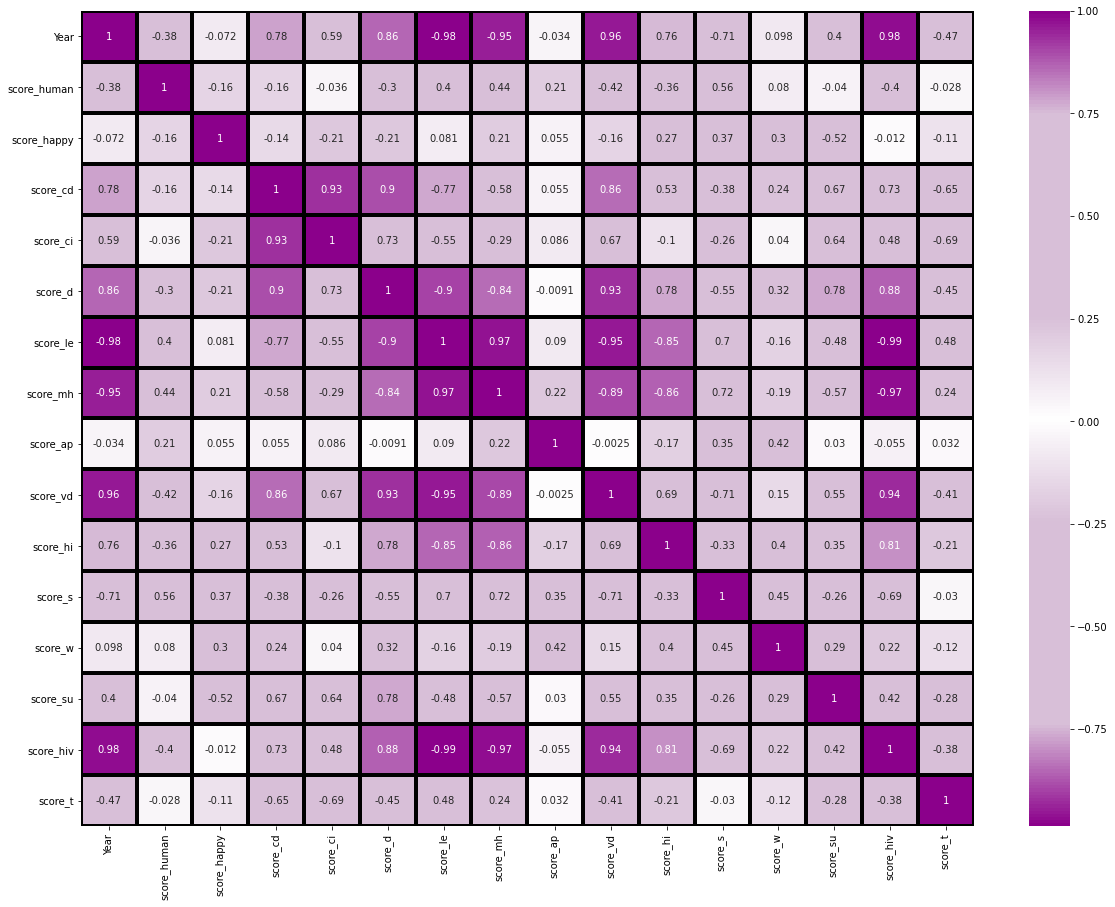

In [20]:
plt.figure(figsize = (20,15))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','thistle','white','thistle','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

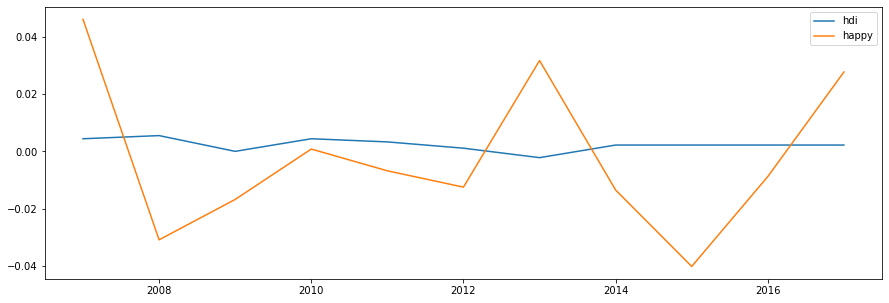

In [21]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
#plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

In [22]:
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t
11,United States,2017,0.0022,0.0277,0.0047,0.0029,0.0029,-0.0003,NaN,0.0010,0.0278,NaN,-0.0122,-0.0141,-0.0004,0.0582,-0.0409
10,United States,2016,0.0022,-0.0088,0.0151,0.0064,0.0140,-0.0003,-0.0084,-0.0580,0.0472,NaN,-0.0415,-0.0335,0.0269,0.0531,-0.0380
9,United States,2015,0.0022,-0.0402,-0.0039,0.0010,0.0078,-0.0002,-0.0107,-0.0156,0.0161,NaN,-0.0364,-0.0243,0.0256,0.0467,-0.0352
8,United States,2014,0.0022,-0.0135,-0.0063,-0.0008,0.0027,0.0002,-0.0085,-0.0475,-0.0013,0.0334,-0.0349,-0.0253,0.0128,0.0405,-0.0324
7,United States,2013,-0.0022,0.0317,-0.0110,-0.0021,-0.0001,0.0006,-0.0086,-0.0318,0.0037,0.0248,-0.0298,-0.0186,0.0035,0.0320,-0.0289
6,United States,2012,0.0011,-0.0125,-0.0144,-0.0029,-0.0037,0.0011,-0.0057,-0.0604,-0.0228,0.0036,-0.0251,-0.0197,0.0041,0.0226,-0.0250
5,United States,2011,0.0033,-0.0068,-0.0072,-0.0002,0.0010,0.0016,-0.0038,0.0191,-0.0153,0.0072,0.0025,0.0085,0.0170,0.0130,-0.0214
4,United States,2010,0.0044,0.0008,-0.0243,-0.0035,-0.0138,0.0021,-0.0022,-0.0397,-0.0565,-0.0024,-0.0290,-0.0762,-0.0077,-0.0073,-0.0235
3,United States,2009,0.0000,-0.0168,-0.0129,0.0008,-0.0096,0.0024,0.0009,-0.0290,-0.0529,-0.0083,-0.0176,-0.0654,0.0064,-0.0261,-0.0302
2,United States,2008,0.0055,-0.0309,-0.0112,0.0000,-0.0092,0.0026,-0.0002,-0.0179,-0.0568,-0.0012,0.0297,-0.0232,0.0075,-0.0322,-0.0331


# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)
    If the data shows a decrease but is 'good' (decrease in deaths) reverse the sign.
    Same for 'bad' factors, make sure they are negative.

In [23]:
df_merged.columns

Index(['Entity', 'Year', 'score_human', 'score_happy', 'score_cd', 'score_ci',
       'score_d', 'score_le', 'score_mh', 'score_ap', 'score_vd', 'score_hi',
       'score_s', 'score_w', 'score_su', 'score_hiv', 'score_t'],
      dtype='object')

In [24]:
df_merged['score_cd'] = df_merged['score_cd'] *-1
df_merged['score_ci'] = df_merged['score_ci'] *-1
df_merged['score_d'] = df_merged['score_d'] *-1
df_merged['score_mh'] = df_merged['score_mh'] *-1
df_merged['score_ap'] = df_merged['score_ap'] *-1
df_merged['score_vd'] = df_merged['score_vd'] *-1
df_merged['score_s'] = df_merged['score_s'] *-1
df_merged['score_w'] = df_merged['score_w'] *-1
df_merged['score_su'] = df_merged['score_su'] *-1
df_merged['score_hiv'] = df_merged['score_hiv'] *-1
df_merged['score_t'] = df_merged['score_t'] *-1

In [25]:
#make dfs for storage
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
score_ap = []
score_vd = []
score_hi = []
score_s = []
score_w = []
score_su = []
score_hiv = []
score_t = []
#organize dfs in a dictionary
names_dic = { 3 : score_cd, 
              4 : score_ci, 
              5 : score_d, 
              6 : score_le,
              7 : score_mh,
              8 : score_ap, 
              9 : score_vd, 
              10 : score_hi, 
              11 : score_s,
              12 : score_w,
              13 : score_su, 
              14 : score_hiv, 
              15 : score_t      
            }

#make variables for the loop
col_count = len(df_merged.columns)-4
col = 4
corr_col = 3
dic_ind = 3
columns_list = list(df_merged.columns)

In [26]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_col]
        num = i * 1
        names_dic[dic_ind].append(num)
        
    col +=1
    corr_col += 1
    dic_ind += 1
names_dic

{3: [-0.0047,
  -0.0151,
  0.0039,
  0.0063,
  0.011,
  0.0144,
  0.0072,
  0.0243,
  0.0129,
  0.0112,
  0.019,
  nan],
 4: [-0.0029,
  -0.0064,
  -0.001,
  0.0008,
  0.0021,
  0.0029,
  0.0002,
  0.0035,
  -0.0008,
  -0.0,
  0.0023,
  nan],
 5: [-0.0029,
  -0.014,
  -0.0078,
  -0.0027,
  0.0001,
  0.0037,
  -0.001,
  0.0138,
  0.0096,
  0.0092,
  0.0111,
  nan],
 6: [-0.0003,
  -0.0003,
  -0.0002,
  0.0002,
  0.0006,
  0.0011,
  0.0016,
  0.0021,
  0.0024,
  0.0026,
  0.0027,
  nan],
 7: [nan,
  0.0084,
  0.0107,
  0.0085,
  0.0086,
  0.0057,
  0.0038,
  0.0022,
  -0.0009,
  0.0002,
  -0.0003,
  nan],
 8: [-0.001,
  0.058,
  0.0156,
  0.0475,
  0.0318,
  0.0604,
  -0.0191,
  0.0397,
  0.029,
  0.0179,
  0.0309,
  nan],
 9: [-0.0278,
  -0.0472,
  -0.0161,
  0.0013,
  -0.0037,
  0.0228,
  0.0153,
  0.0565,
  0.0529,
  0.0568,
  0.0914,
  nan],
 10: [nan,
  nan,
  nan,
  0.0334,
  0.0248,
  0.0036,
  0.0072,
  -0.0024,
  -0.0083,
  -0.0012,
  0.0059,
  nan],
 11: [0.0122,
  0.0415,
  0.

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [27]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh','weighted_ap','weighted_vd','weighted_hi','weighted_s','weighted_w','weighted_su','weighted_hiv','weighted_t']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final['total_weighted'] = final['weighted_cd'] + final['weighted_ci'] + final['weighted_d'] + final['weighted_le'] + final['weighted_ap'] + final['weighted_vd'] + final['weighted_s'] + final['weighted_w'] + final['weighted_su'] + final['weighted_hiv'] + final['weighted_t']
final

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,weighted_cd,weighted_ci,weighted_d,weighted_le,weighted_mh,weighted_ap,weighted_vd,weighted_hi,weighted_s,weighted_w,weighted_su,weighted_hiv,weighted_t,year,total_weighted
0,United States,2017,0.0022,0.0277,-0.0047,-0.0029,-0.0029,-0.0003,NaN,-0.0010,-0.0278,NaN,0.0122,0.0141,0.0004,-0.0582,0.0409,-0.0047,-0.0029,-0.0029,-0.0003,NaN,-0.0010,-0.0278,NaN,0.0122,0.0141,0.0004,-0.0582,0.0409,2017,-0.0302
1,United States,2016,0.0022,-0.0088,-0.0151,-0.0064,-0.0140,-0.0003,0.0084,0.0580,-0.0472,NaN,0.0415,0.0335,-0.0269,-0.0531,0.0380,-0.0151,-0.0064,-0.0140,-0.0003,0.0084,0.0580,-0.0472,NaN,0.0415,0.0335,-0.0269,-0.0531,0.0380,2016,0.0080
2,United States,2015,0.0022,-0.0402,0.0039,-0.0010,-0.0078,-0.0002,0.0107,0.0156,-0.0161,NaN,0.0364,0.0243,-0.0256,-0.0467,0.0352,0.0039,-0.0010,-0.0078,-0.0002,0.0107,0.0156,-0.0161,NaN,0.0364,0.0243,-0.0256,-0.0467,0.0352,2015,0.0180
3,United States,2014,0.0022,-0.0135,0.0063,0.0008,-0.0027,0.0002,0.0085,0.0475,0.0013,0.0334,0.0349,0.0253,-0.0128,-0.0405,0.0324,0.0063,0.0008,-0.0027,0.0002,0.0085,0.0475,0.0013,0.0334,0.0349,0.0253,-0.0128,-0.0405,0.0324,2014,0.0927
4,United States,2013,-0.0022,0.0317,0.0110,0.0021,0.0001,0.0006,0.0086,0.0318,-0.0037,0.0248,0.0298,0.0186,-0.0035,-0.0320,0.0289,0.0110,0.0021,0.0001,0.0006,0.0086,0.0318,-0.0037,0.0248,0.0298,0.0186,-0.0035,-0.0320,0.0289,2013,0.0837
5,United States,2012,0.0011,-0.0125,0.0144,0.0029,0.0037,0.0011,0.0057,0.0604,0.0228,0.0036,0.0251,0.0197,-0.0041,-0.0226,0.0250,0.0144,0.0029,0.0037,0.0011,0.0057,0.0604,0.0228,0.0036,0.0251,0.0197,-0.0041,-0.0226,0.0250,2012,0.1484
6,United States,2011,0.0033,-0.0068,0.0072,0.0002,-0.0010,0.0016,0.0038,-0.0191,0.0153,0.0072,-0.0025,-0.0085,-0.0170,-0.0130,0.0214,0.0072,0.0002,-0.0010,0.0016,0.0038,-0.0191,0.0153,0.0072,-0.0025,-0.0085,-0.0170,-0.0130,0.0214,2011,-0.0154
7,United States,2010,0.0044,0.0008,0.0243,0.0035,0.0138,0.0021,0.0022,0.0397,0.0565,-0.0024,0.0290,0.0762,0.0077,0.0073,0.0235,0.0243,0.0035,0.0138,0.0021,0.0022,0.0397,0.0565,-0.0024,0.0290,0.0762,0.0077,0.0073,0.0235,2010,0.2836
8,United States,2009,0.0000,-0.0168,0.0129,-0.0008,0.0096,0.0024,-0.0009,0.0290,0.0529,-0.0083,0.0176,0.0654,-0.0064,0.0261,0.0302,0.0129,-0.0008,0.0096,0.0024,-0.0009,0.0290,0.0529,-0.0083,0.0176,0.0654,-0.0064,0.0261,0.0302,2009,0.2389
9,United States,2008,0.0055,-0.0309,0.0112,-0.0000,0.0092,0.0026,0.0002,0.0179,0.0568,-0.0012,-0.0297,0.0232,-0.0075,0.0322,0.0331,0.0112,-0.0000,0.0092,0.0026,0.0002,0.0179,0.0568,-0.0012,-0.0297,0.0232,-0.0075,0.0322,0.0331,2008,0.1490


In [28]:
new1 = pd.DataFrame(data = final.iloc[:,1])
new1['Factor'] = 'Decrease in Cancer Deaths'
new1['Total'] = final.iloc[:,-1]
new1['Score'] = final.iloc[:,17]

new2 = pd.DataFrame(data = final.iloc[:,1])
new2['Factor'] = 'Decrease in Cancer Incidences'
new2['Total'] = final.iloc[:,-1]
new2['Score'] = final.iloc[:,18]

new3 = pd.DataFrame(data = final.iloc[:,1])
new3['Factor'] = 'Decrease in Autism'
new3['Total'] = final.iloc[:,-1]
new3['Score'] = final.iloc[:,19]

new4 = pd.DataFrame(data = final.iloc[:,1])
new4['Factor'] = 'Life Expectancy'
new4['Total'] = final.iloc[:,-1]
new4['Score'] = final.iloc[:,20]

#skip mental health

new5 = pd.DataFrame(data = final.iloc[:,1])
new5['Factor'] = 'Decrease in Air Pollution'
new5['Total'] = final.iloc[:,-1]
new5['Score'] = final.iloc[:,22]

new6 = pd.DataFrame(data = final.iloc[:,1])
new6['Factor'] = 'Decrease in Vaccine Preventable Disease'
new6['Total'] = final.iloc[:,-1]
new6['Score'] = final.iloc[:,23]

#skip health insurance

new7 = pd.DataFrame(data = final.iloc[:,1])
new7['Factor'] = 'Decrease in Suicide'
new7['Total'] = final.iloc[:,-1]
new7['Score'] = final.iloc[:,25]

new8 = pd.DataFrame(data = final.iloc[:,1])
new8['Factor'] = 'Decrease in Death by Unsafe Drinking Water'
new8['Total'] = final.iloc[:,-1]
new8['Score'] = final.iloc[:,26]

new9 = pd.DataFrame(data = final.iloc[:,1])
new9['Factor'] = 'Decrease in Death by Unsanitary Conditions'
new9['Total'] = final.iloc[:,-1]
new9['Score'] = final.iloc[:,27]

new10 = pd.DataFrame(data = final.iloc[:,1])
new10['Factor'] = 'Decrease in HIV Incidences'
new10['Total'] = final.iloc[:,-1]
new10['Score'] = final.iloc[:,28]

new11 = pd.DataFrame(data = final.iloc[:,1])
new11['Factor'] = 'Decrease in TB Incidences'
new11['Total'] = final.iloc[:,-1]
new11['Score'] = final.iloc[:,29]

In [29]:
new_list = [new2, new3, new4, new5,new6, new7, new8, new5,new9, new10, new11]
all = new1.append(new_list, ignore_index = True)
all.tail(60)


,Year,Factor,Total,Score
84,2017,Decrease in Death by Unsafe Drinking Water,-0.0302,0.0141
85,2016,Decrease in Death by Unsafe Drinking Water,0.0080,0.0335
86,2015,Decrease in Death by Unsafe Drinking Water,0.0180,0.0243
87,2014,Decrease in Death by Unsafe Drinking Water,0.0927,0.0253
88,2013,Decrease in Death by Unsafe Drinking Water,0.0837,0.0186
89,2012,Decrease in Death by Unsafe Drinking Water,0.1484,0.0197
90,2011,Decrease in Death by Unsafe Drinking Water,-0.0154,-0.0085
91,2010,Decrease in Death by Unsafe Drinking Water,0.2836,0.0762
92,2009,Decrease in Death by Unsafe Drinking Water,0.2389,0.0654
93,2008,Decrease in Death by Unsafe Drinking Water,0.1490,0.0232


In [30]:
finalyr = final.set_index('Year').T
finalyr

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
score_human,0.0022,0.0022,0.0022,0.0022,-0.0022,0.0011,0.0033,0.0044,0.0,0.0055,0.0044,NaN
score_happy,0.0277,-0.0088,-0.0402,-0.0135,0.0317,-0.0125,-0.0068,0.0008,-0.0168,-0.0309,0.0461,NaN
score_cd,-0.0047,-0.0151,0.0039,0.0063,0.011,0.0144,0.0072,0.0243,0.0129,0.0112,0.019,NaN
score_ci,-0.0029,-0.0064,-0.001,0.0008,0.0021,0.0029,0.0002,0.0035,-0.0008,-0.0,0.0023,NaN
score_d,-0.0029,-0.014,-0.0078,-0.0027,0.0001,0.0037,-0.001,0.0138,0.0096,0.0092,0.0111,NaN
score_le,-0.0003,-0.0003,-0.0002,0.0002,0.0006,0.0011,0.0016,0.0021,0.0024,0.0026,0.0027,NaN
score_mh,NaN,0.0084,0.0107,0.0085,0.0086,0.0057,0.0038,0.0022,-0.0009,0.0002,-0.0003,NaN
score_ap,-0.001,0.058,0.0156,0.0475,0.0318,0.0604,-0.0191,0.0397,0.029,0.0179,0.0309,NaN
score_vd,-0.0278,-0.0472,-0.0161,0.0013,-0.0037,0.0228,0.0153,0.0565,0.0529,0.0568,0.0914,NaN


In [31]:
final.to_csv('by_factor.csv')
finalyr.to_csv('by_yr.csv')
all.to_csv('all.csv')
